# Boat Listing Survey

## Company Background

Nearly New Nautical is a website that allows users to advertise their used boats for sale. When
users list their boat, they have to provide a range of information about their boat. Boats that
get lots of views bring more traffic to the website, and more potential customers.
To boost traffic to the website, the product manager wants to prevent listing boats that do
not receive many views

### Customer Question

The product manager wants to know the following:

● Based on the boat's features, can you predict the number of views a listing will
receive?


### Success Criteria

The product manager would consider using your model if, on average, the predictions were
only 50% off the true number of views a listing would receive.

## Dataset 

![Dataset](dataset.png)

### Submission Requirements

1. You are going to create a written report to summarize the analysis you have performed and your findings. This report should be for the data science manager. The task list below describes what they expect to see in your report.

2. You will need to use DataCamp Workspace to complete your analysis, write up your findings and share visualizations.

3. You must use the data we provide for the analysis.

4. You will also need to prepare and deliver an oral presentation. You should prepare
around 8-10 slides to present to the non-technical customer. The task list below
describes what they expect to see in the presentation.

5. Your presentation must be no longer than 10 minutes.

## Task List- Written Report

Your written report should include both code, output and written text summaries of the
following:

● Data validation, including a summary of any changes you make to the data

● Exploratory Analysis, including graphics to support your findings

● Model Development, including justification for your choice of models

● Model Evaluation, including explanation of what this means about your models

● Comparison to the business success criteria

● Final summary including recommendations for future work that the business should
undertake

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [116]:
# Import the data 
df = pd.read_csv(r"C:\Users\User\Desktop\Python\Datacamp project\boat_data.csv")
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [117]:
# Check the shape of the data 
df.shape

print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Rows : 9888
Columns : 10


There are 9888 instances and 10 attributes in the data . Let us check the df.info

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


From the info, we can see that Manufacturer, Type, Length, Width, Material, Location are not of 9888 instances so we need to check these out first whether there are null values

In [119]:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

**From the above we can see that the Manufacturer, Width, Material and Location Attributes are having Null values**

1. Now let us check all the Attributes one by one 
2. We can see that the Price column is Object type with Currency and Price in Same column and hence we need to split the Currency column and Price column seperately and then make the Price column to be Float or int

In [120]:
# Split the currency and price column 
df[['Currency', 'Price']]= df['Price'].str.split(' ', 1, expand=True)

In [121]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR


In [122]:
#The number of columns now is 11 after splitting Price column to Currency and Price 
df.shape

(9888, 11)

In [123]:
df.Currency.value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: Currency, dtype: int64

In [124]:
df.Currency.unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [125]:
df['Currency'].replace('Â£', 'GBP', inplace=True)
df.Currency.unique()

array(['CHF', 'EUR', 'DKK', 'GBP'], dtype=object)

In [126]:
currency_converter = {'EUR' : 1, 'CHF' : 1.2, 'DKK' : 0.13,'GBP': 1.17 }
print(currency_converter)

{'EUR': 1, 'CHF': 1.2, 'DKK': 0.13, 'GBP': 1.17}


In [127]:
df['Price'] = df['Price'].astype(np.float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   float64
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  Currency                     9888 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 849.9+ KB


In [128]:
df['Price_EUR']=df['Price'] * df['Currency'].apply(lambda x: currency_converter[x])
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_EUR
0,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF,4004.4
1,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR,3490.0
2,3770.0,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF,4524.0
3,25900.0,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK,3367.0
4,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR,3399.0


1. From the given dataset Boat Type is Character, Manufacturer is Character, Type is Character is OK 

2. Length and Width are float is OK 

3. Material and Location are Object Type is OK 

4. Number of views is int and Currency is Object type is OK 

In [129]:
#Let us check the Boat Type Attribute 
df['Boat Type'].value_counts()

Motor Yacht                        2720
Sport Boat                         1407
Flybridge                          1194
Trawler                             679
Pilothouse                          613
                                   ... 
Bowrider,Motor Yacht,Sport Boat       1
Sport Boat,Working Boat               1
Classic,Motor Yacht,Sport Boat        1
Motor Yacht,Wakeboard/Wakesurf        1
Classic,Runabout,Trawler              1
Name: Boat Type, Length: 126, dtype: int64

In [130]:
df['Boat Type'].value_counts()[df['Boat Type'].value_counts()<= 5]

Classic,Trawler                    5
Sport Boat,Wakeboard/Wakesurf      4
Classic,Sport Boat,Water ski       4
Classic,Launch                     4
Classic,Pontoon Boat               4
                                  ..
Bowrider,Motor Yacht,Sport Boat    1
Sport Boat,Working Boat            1
Classic,Motor Yacht,Sport Boat     1
Motor Yacht,Wakeboard/Wakesurf     1
Classic,Runabout,Trawler           1
Name: Boat Type, Length: 93, dtype: int64

In [131]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days',
       'Currency', 'Price_EUR'],
      dtype='object')

In [132]:
# Find the Null/ NaN values in Manufacturer column
df[df['Manufacturer'].isnull()]
# Fill 'NaN' with 'Unknown'
df['Manufacturer'].fillna("Unknown", inplace=True)

In [133]:
# check the Null values which have gone
df['Manufacturer'].isnull().sum()

0

In [134]:
# Check Null values in Type
df[df['Type'].isnull()]

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_EUR
234,114500.0,Deck Boat,Crescent power boats,NaN,2019,5.00,1.00,NaN,Denmark,45,DKK,14885.0
1877,125000.0,Sport Boat,Formula power boats,NaN,0,8.23,2.59,NaN,Switzerland,146,CHF,150000.0
3272,2500000.0,Motor Yacht,Unknown,NaN,1978,31.30,6.73,NaN,Spain,69,EUR,2500000.0
7421,64000.0,House Boat,Unknown,NaN,1935,14.90,3.20,Steel,Germany,110,EUR,64000.0
8057,351000.0,Bowrider,Campion power boats,NaN,2019,5.00,2.00,NaN,Denmark,41,DKK,45630.0
8260,46000.0,"Classic,Runabout",Boesch power boats,NaN,1972,5.80,2.10,NaN,Switzerland,341,CHF,55200.0


In [135]:
# Replace Null values in Type column to 'Unknown'
df['Type'].fillna(df['Type'].value_counts().idxmax(), inplace=True)

In [136]:
# There are 551 rows with '0' in the Year Built
df['Year Built'].value_counts()

2020    1279
2019     663
0        551
2008     457
2007     393
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: Year Built, Length: 122, dtype: int64

In [137]:
df['Year Built'].value_counts()

2020    1279
2019     663
0        551
2008     457
2007     393
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: Year Built, Length: 122, dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   float64
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 9888 non-null   object 
 3   Type                         9888 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  Currency                     9888 non-null   object 
 11  Price_EUR                    9888 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 927.1+ KB


In [139]:
# Let us look at the Length Column for Null Values 
df['Length'].isnull().sum()

9

In [140]:
# Check the Median and Mean values of Length column 
print(df.Length.mean())
print(df['Length'].median())


11.570017208219456
10.28


In [141]:
# Replace the Null values of Length column with Mean values
df['Length'].fillna(df['Length'].median(),inplace=True)

In [142]:
# Check Null values in Width column and replace the Null values 
print(df['Width'].isnull().sum()) # there are 56 null values 

#Check Mean and Median of Width column 
print(df.Width.mean())
print(df.Width.median())

# Replace Null values with Mean value of Width column 
df['Width'].fillna(df.Width.median(),inplace=True)

56
3.5201240846216435
3.33


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   float64
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 9888 non-null   object 
 3   Type                         9888 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9888 non-null   float64
 6   Width                        9888 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  Currency                     9888 non-null   object 
 11  Price_EUR                    9888 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 927.1+ KB


In [144]:
# Check the Null values in Material Column 
print(df.Material.isnull().sum())

# Check the unique count of each material 
df[df['Material'].isna()]

1749


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_EUR
0,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226,CHF,4004.4
3,25900.0,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64,DKK,3367.0
7,24800.0,Sport Boat,Unknown,Used boat,0,3.00,3.33,NaN,Denmark,134,DKK,3224.0
8,3333.0,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany,45,EUR,3333.0
9,3300.0,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy,180,EUR,3300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9867,36500.0,Fishing Boat,Hunter power boats,Used boat,2000,5.00,1.00,NaN,Denmark,87,DKK,4745.0
9873,4799.0,Working Boat,Unknown,"new boat from stock,Electric",2019,3.64,1.37,NaN,Germany,41,EUR,4799.0
9879,4990.0,Sport Boat,Pioner power boats,new boat on order,0,4.11,1.73,NaN,Switzerland,280,CHF,5988.0
9883,4900.0,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland,1116,CHF,5880.0


In [145]:
check = df[['Boat Type','Material']]
check

,Boat Type,Material
0,Motor Yacht,NaN
1,Center console boat,Thermoplastic
2,Sport Boat,Aluminium
3,Sport Boat,NaN
4,Fishing Boat,Aluminium
...,...,...
9883,Sport Boat,NaN
9884,Sport Boat,GRP
9885,Sport Boat,GRP
9886,Pontoon Boat,NaN


In [146]:
df['Material'].groupby(df['Boat Type']).value_counts()

Boat Type                      Material     
Bowrider                       GRP              185
                               PVC               30
                               Aluminium         18
                               Thermoplastic      2
Bowrider,Cabin Boat,Deck Boat  GRP                1
                                               ... 
Wakeboard/Wakesurf,Water ski   GRP                1
Water ski                      GRP                8
Working Boat                   Steel             18
                               Aluminium         11
                               GRP                5
Name: Material, Length: 254, dtype: int64

In [147]:
df['Material'].fillna(df['Material'].value_counts().idxmax(),inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   float64
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 9888 non-null   object 
 3   Type                         9888 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9888 non-null   float64
 6   Width                        9888 non-null   float64
 7   Material                     9888 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  Currency                     9888 non-null   object 
 11  Price_EUR                    9888 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 927.1+ KB


In [149]:
df[df['Location'].isna()]

print(df['Location'].mode())

#Fill NA values with mode value GERMANY 
df['Location'].fillna('Germany',inplace=True)

0    Germany
Name: Location, dtype: object


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   float64
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 9888 non-null   object 
 3   Type                         9888 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9888 non-null   float64
 6   Width                        9888 non-null   float64
 7   Material                     9888 non-null   object 
 8   Location                     9888 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
 10  Currency                     9888 non-null   object 
 11  Price_EUR                    9888 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 927.1+ KB


In [151]:
df.sample(5)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_EUR
1954,125000.0,Cabin Boat,Atlantis power boats,"Used boat,Diesel",2007,10.67,3.60,GRP,Germany,364,EUR,125000.0
6244,115000.0,Motor Yacht,Fratelli Aprea power boats,"Used boat,Diesel",2003,9.75,3.63,PVC,Croatia,119,EUR,115000.0
5501,175000.0,Pilothouse,Jeanneau power boats,Used boat,2019,9.95,2.99,GRP,Italy,123,EUR,175000.0
2377,229000.0,Hardtop,Saga power boats,"Used boat,Diesel",2013,11.00,3.47,GRP,Switzerland,247,CHF,274800.0
4753,280000.0,Motor Yacht,BÃ©nÃ©teau power boats,"Used boat,Diesel",2010,14.80,4.33,GRP,Malta,79,EUR,280000.0


In [152]:
df['Boat Type'].value_counts()

Motor Yacht                        2720
Sport Boat                         1407
Flybridge                          1194
Trawler                             679
Pilothouse                          613
                                   ... 
Bowrider,Motor Yacht,Sport Boat       1
Sport Boat,Working Boat               1
Classic,Motor Yacht,Sport Boat        1
Motor Yacht,Wakeboard/Wakesurf        1
Classic,Runabout,Trawler              1
Name: Boat Type, Length: 126, dtype: int64

In [153]:
df[['Boat Type','Boat_type1']]= df['Boat Type'].str.split(',',1,expand=True)

In [154]:
df=df.drop(['Boat_type1'],axis=1)

In [155]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_EUR
0,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,Switzerland,226,CHF,4004.4
1,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,EUR,3490.0
2,3770.0,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,CHF,4524.0
3,25900.0,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,Denmark,64,DKK,3367.0
4,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,EUR,3399.0


In [156]:
df=df.drop(['Price','Currency'],axis=1)

In [157]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price_EUR
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,GRP,Switzerland,226,4004.4
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,3490.0
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124,4524.0
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,GRP,Denmark,64,3367.0
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,3399.0


In [158]:
df.Manufacturer.value_counts()

Unknown                        1338
BÃ©nÃ©teau power boats          631
Jeanneau power boats            537
Sunseeker power boats           383
Princess power boats            241
                               ... 
ISA Yachts power boats            1
Couach power boats                1
Perini Navi Spa power boats       1
Palmer Johnson power boats        1
Hunter power boats                1
Name: Manufacturer, Length: 911, dtype: int64

Text(0.5, 1.0, 'Width Distribution')

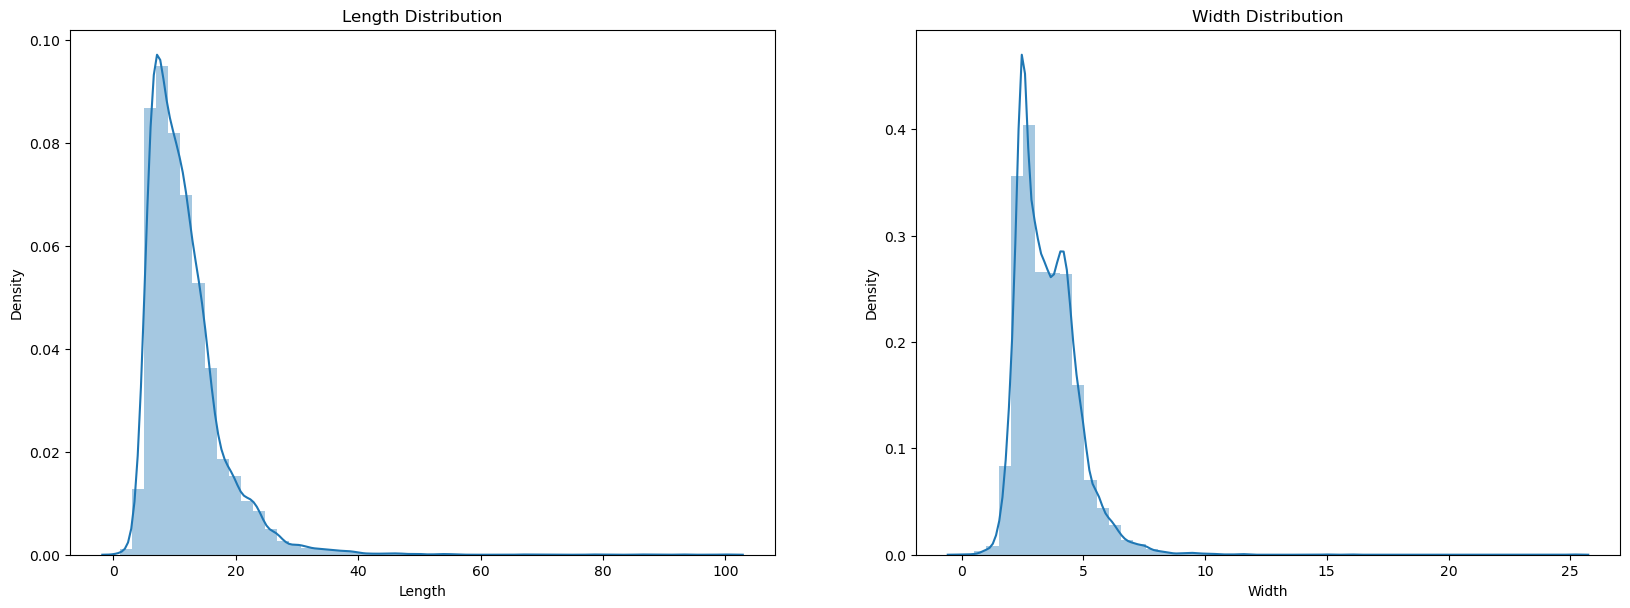

In [159]:
fig= plt.figure(figsize=(20,15))
ax1= fig.add_subplot(223)
sns.distplot(df.Length)
ax1.set_title("Length Distribution")
ax2= fig.add_subplot(224)
sns.distplot(df.Width)
ax2.set_title("Width Distribution")

In [160]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days,Price_EUR
count,9888.000000,9888.000000,9888.000000,9888.000000,9.888000e+03
mean,1893.192860,11.568843,3.519047,149.160801,3.043694e+05
std,460.201582,6.000213,1.217156,151.819752,9.712164e+05
min,0.000000,1.040000,0.010000,13.000000,3.224000e+03
25%,1996.000000,7.470000,2.550000,70.000000,4.426000e+04
50%,2007.000000,10.280000,3.330000,108.000000,9.500000e+04
75%,2017.000000,13.920000,4.250000,172.000000,2.490000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07


### Exploratory Data Analysis

#### May get more number of views depending on Boat type?

,Boat Type,Number of views last 7 days
21,Offshore Boat,225.754386
22,Cabin Boat,248.871560
23,Classic,253.743842
24,Water ski,297.900000
25,Wakeboard/Wakesurf,373.450000


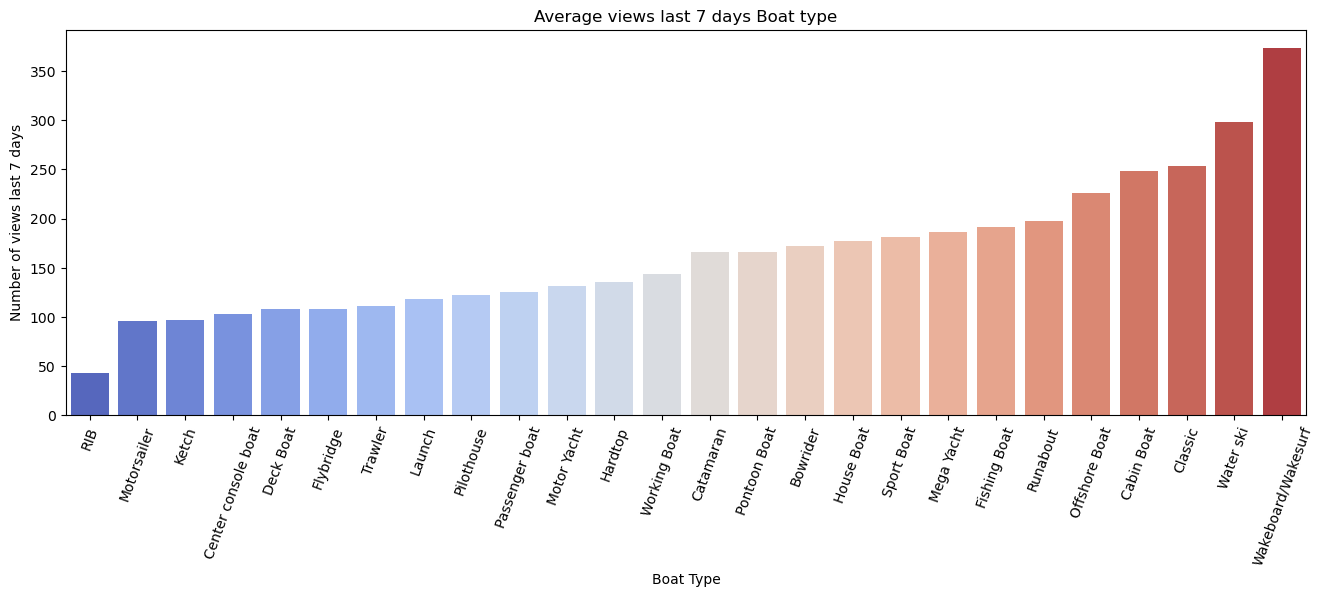

In [161]:
fig= plt.figure(figsize=(16,5))
Boat_type_view= df.groupby('Boat Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Boat Type', y= 'Number of views last 7 days', data= Boat_type_view, palette="coolwarm")
plt.title("Average views last 7 days Boat type")
plt.xticks(rotation=70)
ax1.tick_params(rotation=70)
display(Boat_type_view[-5:])

1. The average views increases when the boat type is Wakeboard/Wakesurf, Waterski and Classic,Cabin boat, Offshore boat having highest
average views 

2. The highest average views is Wakeboard/Wakesurf

### How Essential is the type of boat engine and whether the boat is (Condition) used or new in attracting more views? 

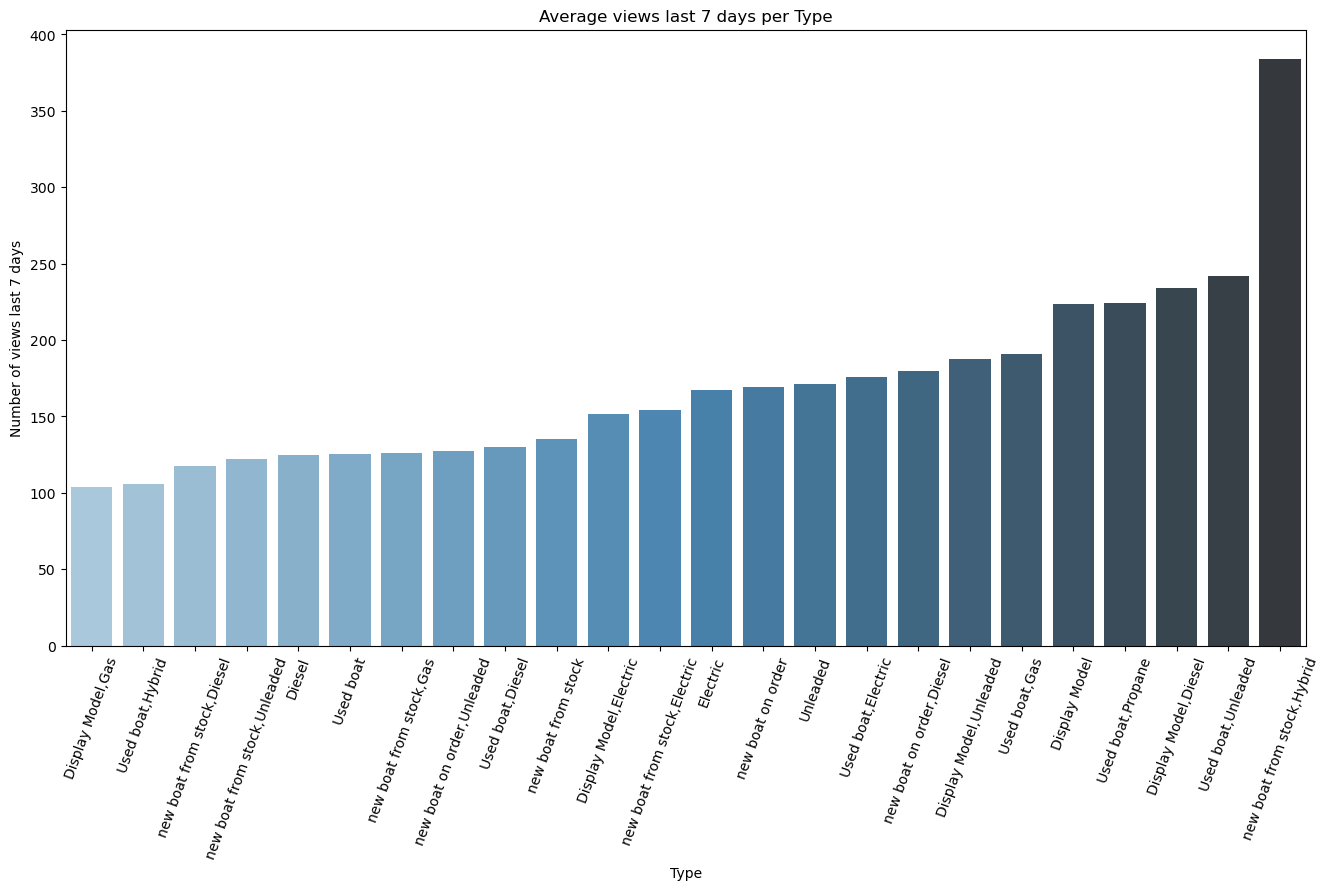

In [162]:
fig= plt.figure(figsize=(16,8))
Type_view= df.groupby('Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Type', y= 'Number of views last 7 days', data=Type_view, palette='Blues_d')
plt.title("Average views last 7 days per Type")
plt.xticks(rotation=70)
ax1.tick_params(rotation=70)

Engine Type

Text(0.5, 1.0, 'Average views last 7 days per Engine Type')

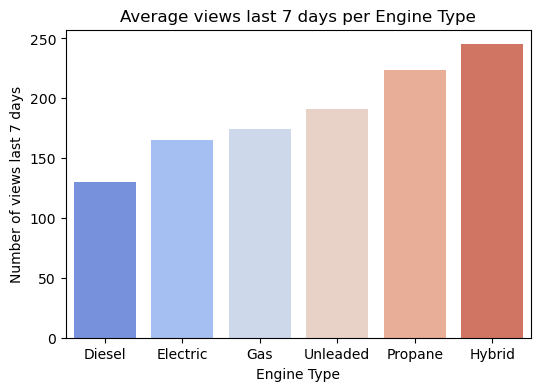

In [163]:
# Create Engine type column 
df['Engine Type']= df['Type'].str.split(',', expand=True)[1]

## Convert None to nan
df['Engine Type']= df['Engine Type'].replace('None', np.nan)

fig= plt.figure(figsize=(6,4))
Type_view_e= df.groupby('Engine Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Engine Type', y='Number of views last 7 days', data=Type_view_e, palette="coolwarm")
plt.title("Average views last 7 days per Engine Type")

#### Condition

Text(0.5, 1.0, 'Average views last 7 days per Condition')

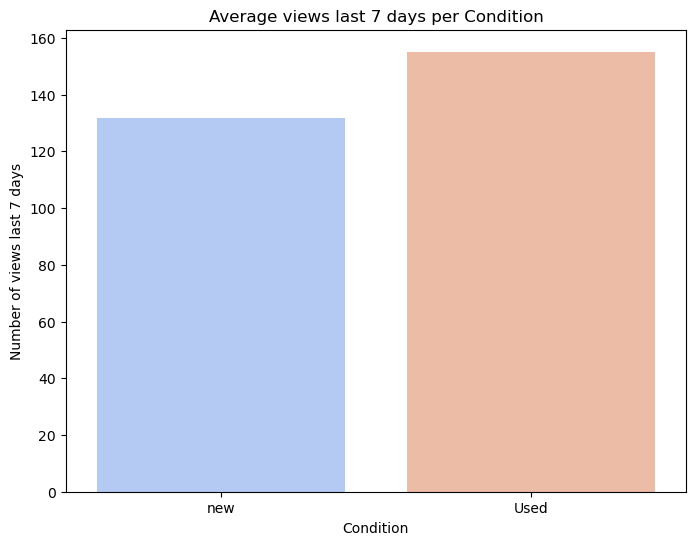

In [164]:
df['Condition']= df['Type'].str.split(pat=' ', expand=True)[0]

df['Condition']= df['Condition'].replace({'Unleaded':np.nan, 0:np.nan})
df['Condition']= df['Condition'].replace({'Diesel':np.nan, 0:np.nan})
df['Condition']= df['Condition'].replace({'Electric':np.nan, 0:np.nan})

df.loc[df['Condition'] == 'Display', 'Condition'] = "new"



fig= plt.figure(figsize=(8,6))
Condition= df.groupby('Condition')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x= 'Condition', y= 'Number of views last 7 days', data= Condition, palette="coolwarm")
plt.title("Average views last 7 days per Condition")

1. The highest average views when engine type is new 

2. Average views between new and old are not too far apart 

3. Later we will see if this varies from country to country

#### Material

Text(0.5, 1.0, 'Average views last 7 days per material ')

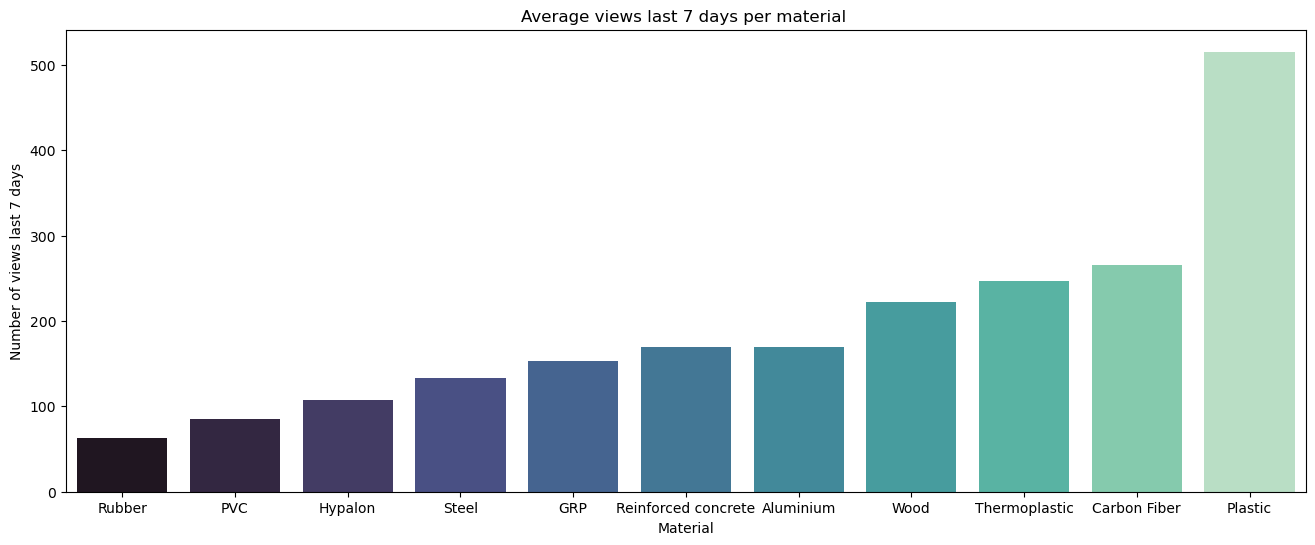

In [165]:
fig= plt.figure(figsize=(16,6))
Material_view= df.groupby('Material')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(x='Material', y= 'Number of views last 7 days', data= Material_view, palette="mako")
plt.title("Average views last 7 days per material ")

The highest average views occur when the material is plastic, which is to be anticipated given that majority of recreational boats are made of plastic

**The average difference between old and new boats does not fall too apart. We shall examine if this differs per country**

[Text(0, 0, 'Germany'),
 Text(1, 0, 'Italy'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Switzerland'),
 Text(4, 0, 'Netherlands'),
 Text(5, 0, 'Croatia'),
 Text(6, 0, 'Spain'),
 Text(7, 0, 'Other'),
 Text(8, 0, 'United'),
 Text(9, 0, 'Denmark')]

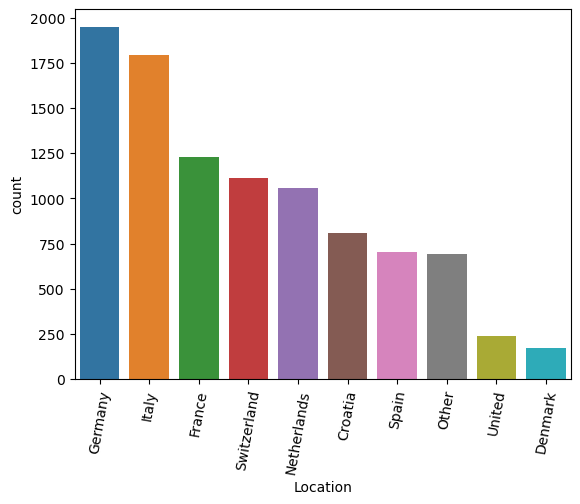

In [166]:
top10_country= df.Location.value_counts().iloc[:10].index

df.loc[~df['Location'].isin(top10_country), 'Location'] ='Other'

ax= sns.countplot(x= 'Location', data= df, order= df.Location.value_counts().iloc[:10].index)

ax.set_xticklabels(ax.get_xticklabels(), rotation= 80)

Number of Views per Country and Condition

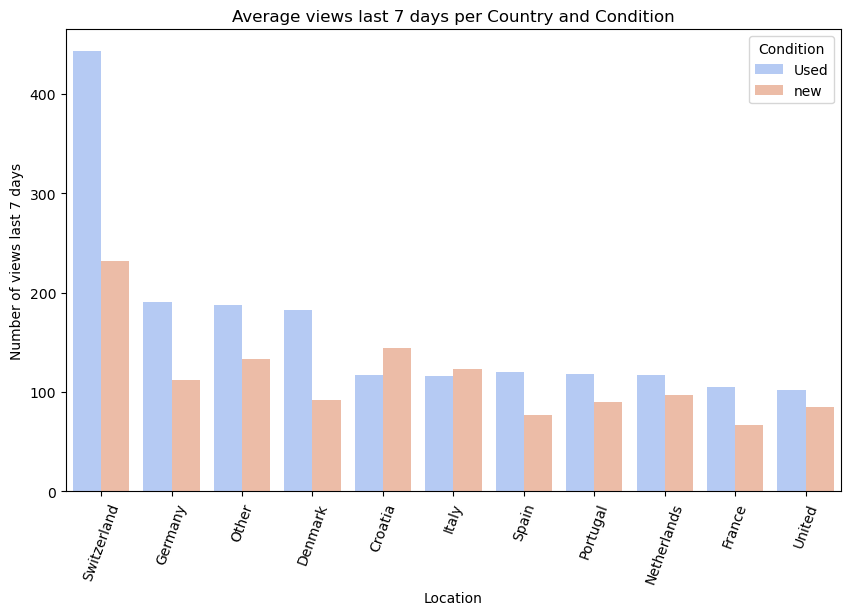

In [167]:
fig= plt.figure(figsize=(10,6))
Country_view= df.groupby(['Location','Condition'])['Number of views last 7 days'].mean().sort_values().reset_index(drop=False).sort_values(by= ['Number of views last 7 days', 'Location'],ascending=False)

sns.barplot(x='Location', y= 'Number of views last 7 days', hue= 'Condition', data= Country_view, 
            palette="coolwarm")

plt.title("Average views last 7 days per Country and Condition")
plt.xticks(rotation=70)
ax1.tick_params(rotation=70)


Number of views per Country & Boat Type 

In [168]:
Country_view= df.groupby(['Location', 'Boat Type'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Location','Number of views last 7 days'],ascending=False)
Country_ViewNew= Country_view[Country_view['Location']== 'Null']

for e in Country_view['Location'].unique():
    Country_ViewNew= Country_ViewNew.append(Country_view[Country_view['Location']== e].head(2))

House Boat            4
Mega Yacht            3
Cabin Boat            3
Wakeboard/Wakesurf    3
Classic               3
Passenger boat        1
Water ski             1
Offshore Boat         1
Bowrider              1
Hardtop               1
Deck Boat             1
Name: Boat Type, dtype: int64

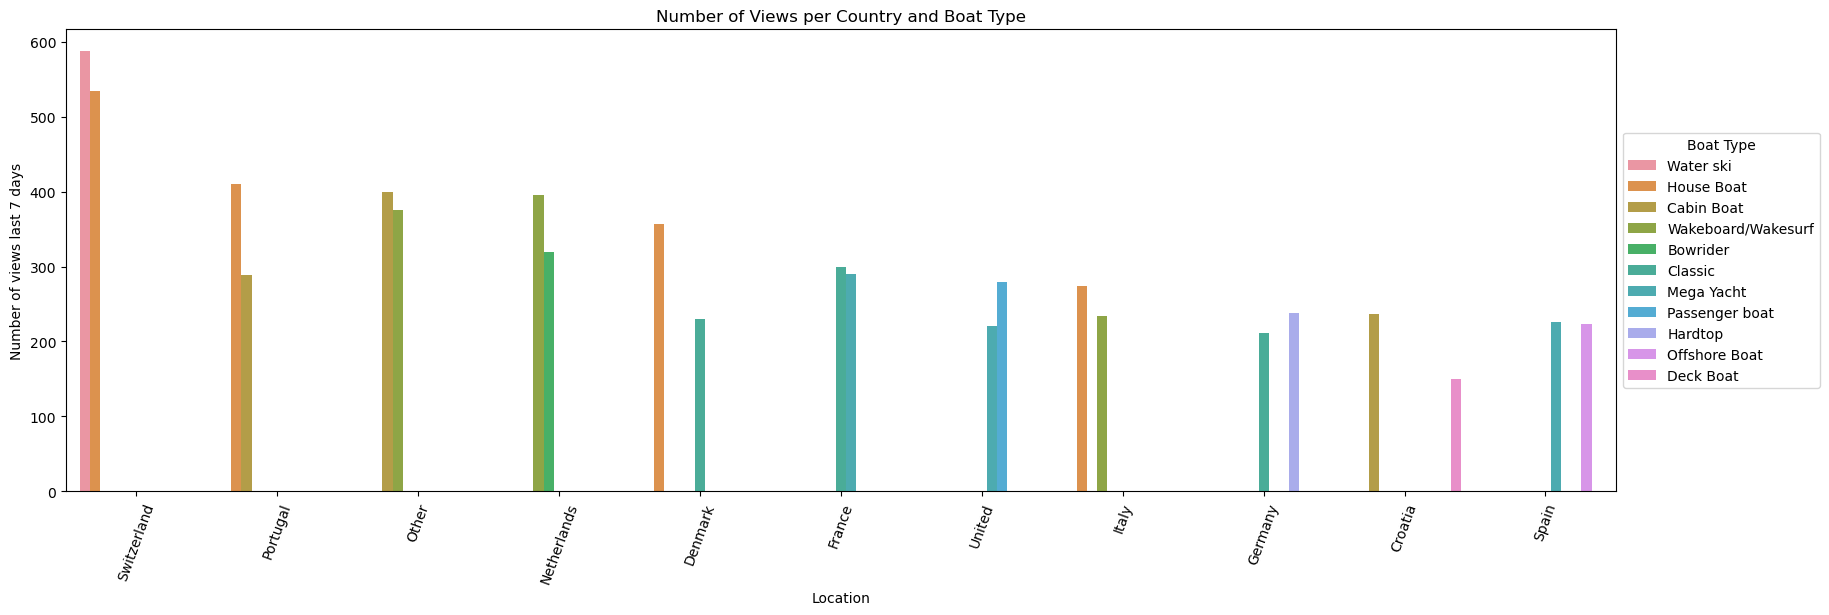

In [169]:
display(Country_ViewNew['Boat Type'].value_counts())
fig= plt.figure(figsize=(20,6))

sns.barplot(x='Location', y= 'Number of views last 7 days', hue='Boat Type', data=Country_ViewNew.sort_values(by = ['Number of views last 7 days'], ascending=False),
            ci=False)
plt.title("Number of Views per Country and Boat Type")
plt.xticks(rotation=70)
plt.legend(loc= 'center left', bbox_to_anchor=(1,0.5),title= 'Boat Type')

NUmber of Views per Country and Engine Type

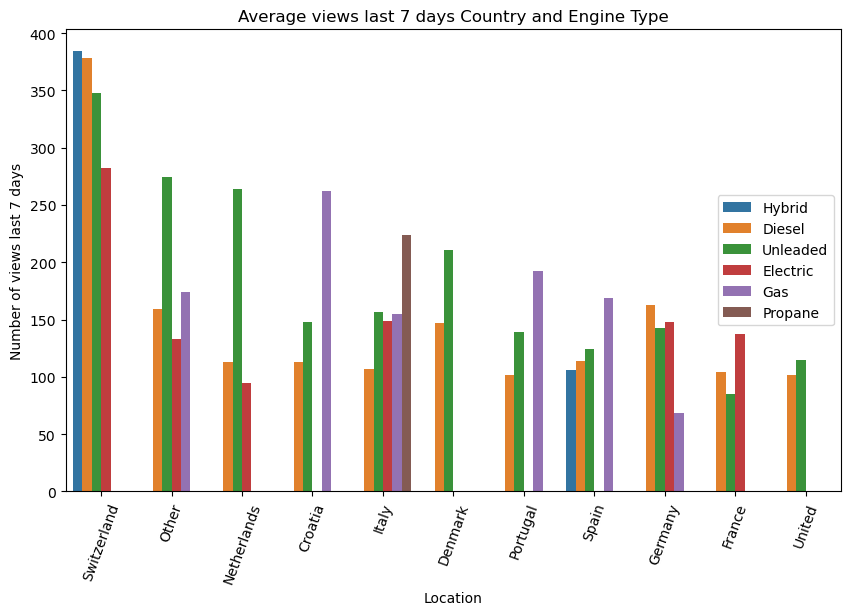

In [170]:
fig=plt.figure(figsize=(10,6))
Country_view= df.groupby(['Location', 'Engine Type'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by = ['Number of views last 7 days','Location'],ascending=False)
sns.barplot(x='Location', y= 'Number of views last 7 days', hue= 'Engine Type', data=Country_view)
plt.title("Average views last 7 days Country and Engine Type")
plt.xticks(rotation=70)
plt.legend(loc= 'right')

1. Most of the countries prefer unleaded and diesel more , but the main demand varies between the countries
2. Switzerland has demand on Hybrid 
3. Croatia and Spain has demand on gas 
4. Italy has demand on Propane 
5. France has demand on Electricity

Number of Views per Country and Material

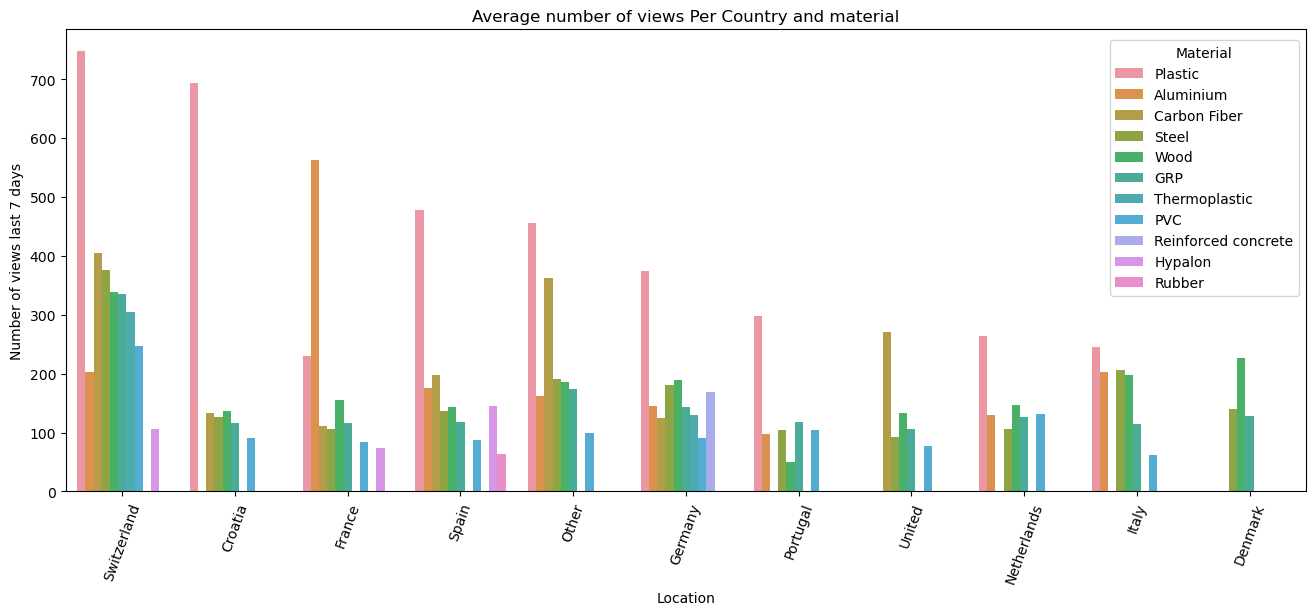

In [171]:
fig= plt.figure(figsize=(16,6))
Country_view= df.groupby(['Location','Material'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Location'],ascending=False)
sns.barplot(x='Location', y= 'Number of views last 7 days', hue= 'Material', data= Country_view)
plt.title("Average number of views Per Country and material")
plt.xticks(rotation=70)
plt.legend(loc= 'center right', bbox_to_anchor=(1,0.7), title='Material')

1. The Country that has the highest views is Switzerland 
2. Average views between the new and used boat is not far enough 
3. All the countries prefer boat type plastic Except Denmark 
4. Netherlands does not prefer Carbon Fiber
5. France has highest preference of Aluminium 

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Boat Type                    9888 non-null   object 
 1   Manufacturer                 9888 non-null   object 
 2   Type                         9888 non-null   object 
 3   Year Built                   9888 non-null   int64  
 4   Length                       9888 non-null   float64
 5   Width                        9888 non-null   float64
 6   Material                     9888 non-null   object 
 7   Location                     9888 non-null   object 
 8   Number of views last 7 days  9888 non-null   int64  
 9   Price_EUR                    9888 non-null   float64
 10  Engine Type                  7602 non-null   object 
 11  Condition                    9808 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 927.1+ KB


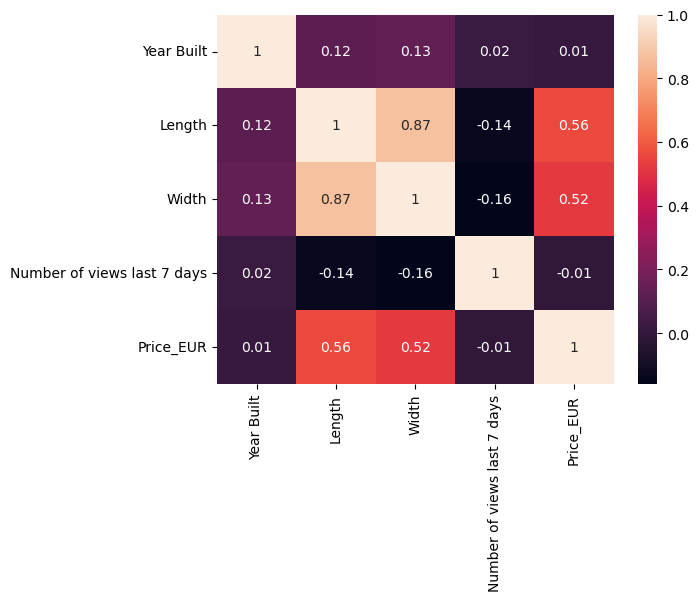

In [ ]:
corr= df.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()

Number of views per Year Built

Text(0.5, 1.0, 'Year Built distribution')

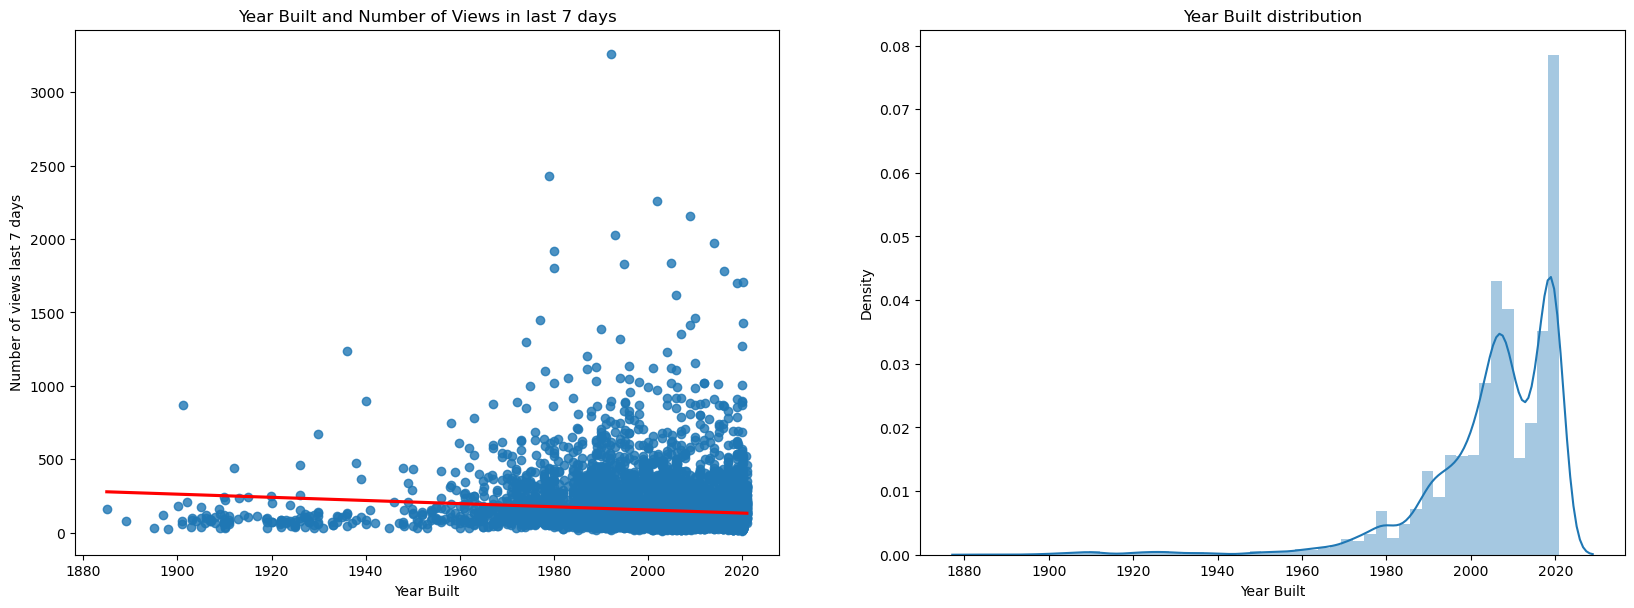

In [185]:
df_test= df[df['Year Built']>0]

fig= plt.figure(figsize=(20,15))
ax1= fig.add_subplot(223)
sns.regplot(x= 'Year Built', y='Number of views last 7 days', data=df_test,
            line_kws={'color':'red'},ci=None, x_jitter=0.1)
ax1.set_title("Year Built and Number of Views in last 7 days")
ax2= fig.add_subplot(224)
sns.distplot(df_test['Year Built'])
ax2.set_title("Year Built distribution")

In [186]:
display(df['Year Built'].quantile([0.25,0.5,0.75]))
df['Year Built'].max()

0.25    1996.0
0.50    2007.0
0.75    2017.0
Name: Year Built, dtype: float64

2021

In [190]:
df['age_group'] = pd.cut(df['Year Built'], bins=[0,2000,2007,2017], 
                         labels=['Very Old (built before 2000)', 'Old (Built between 2000-2017)', 'Modern(built after 2017)'])
df['age_group'].value_counts()

Very Old (built before 2000)     2576
Modern(built after 2017)         2436
Old (Built between 2000-2017)    1979
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Average views last 7 days age_group')

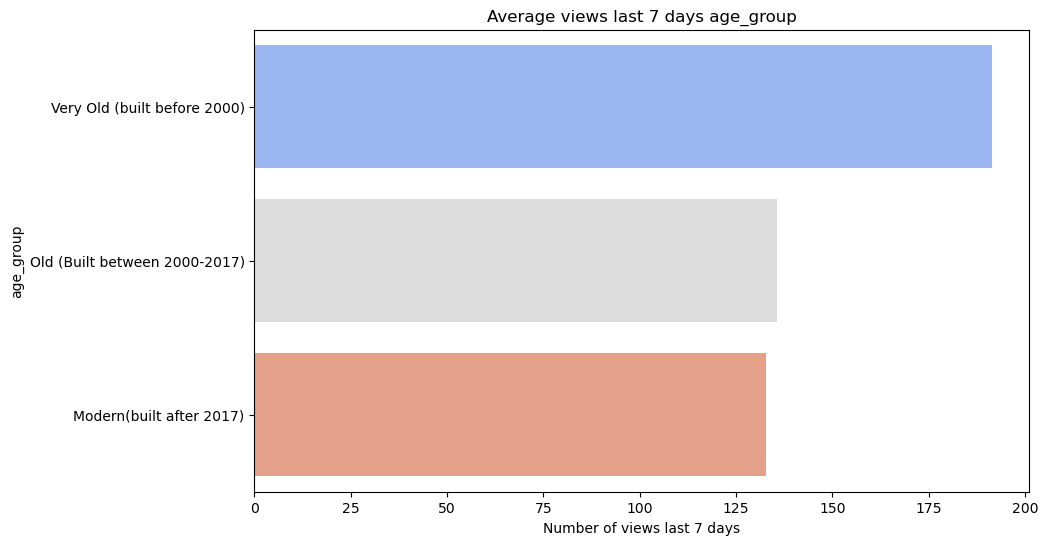

In [191]:
fig= plt.figure(figsize=(10,6))
age_groups= df.groupby('age_group')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)

sns.barplot(y='age_group', x= 'Number of views last 7 days', data=age_groups, palette="coolwarm")
plt.title("Average views last 7 days age_group")

Boats that are very old (built before 2000) have highest average views

**Number of views last 7 days per price**

Text(0.5, 1.0, 'EUR price Distribution')

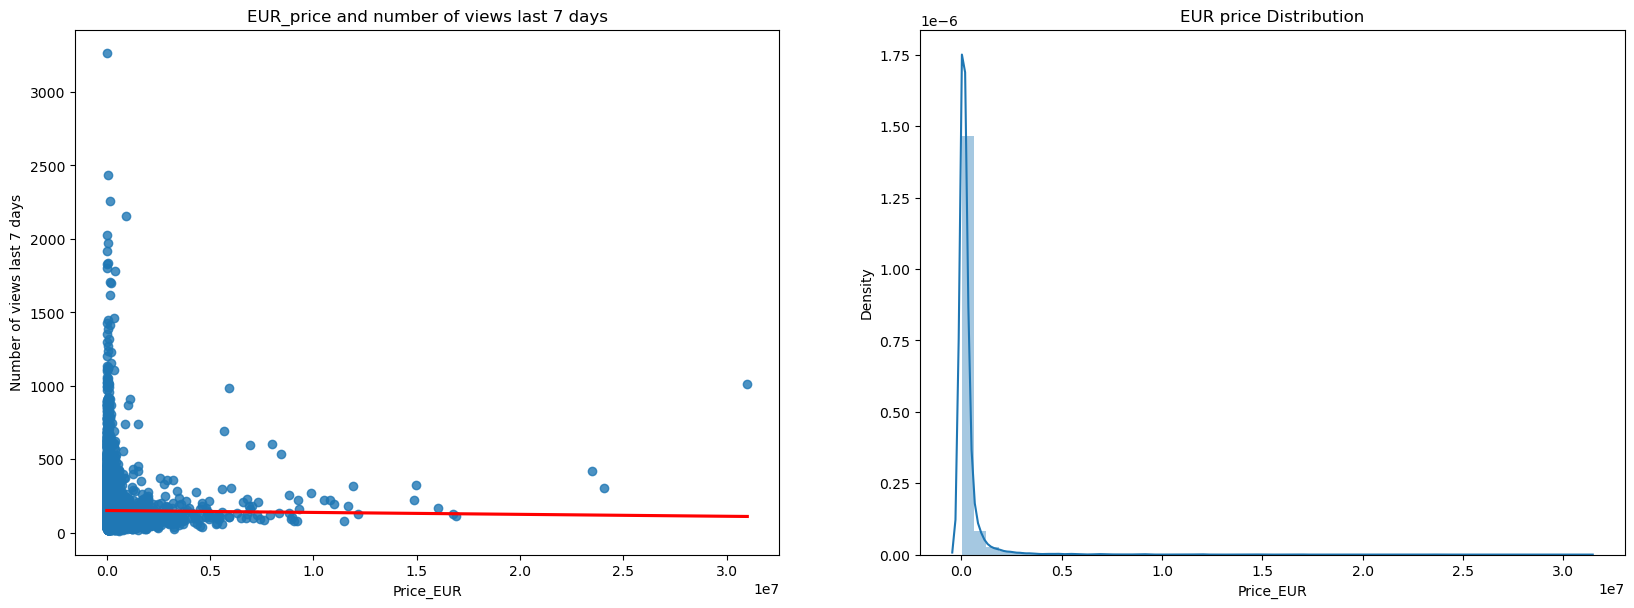

In [197]:
fig= plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(223)
sns.regplot(x='Price_EUR', y= 'Number of views last 7 days', data=df_test ,line_kws={'color': 'red'}, ci=None, x_jitter=0.1)
ax1.set_title("EUR_price and number of views last 7 days")
ax2= fig.add_subplot(224)
sns.distplot(df['Price_EUR'])
ax2.set_title("EUR price Distribution")

In [201]:
display(df['Price_EUR'].quantile([0.25,0.5,0.75]))

df['Price_EUR'].max()

0.25     44260.0
0.50     95000.0
0.75    249000.0
Name: Price_EUR, dtype: float64

31000000.0

In [202]:
df['price_group']= pd.cut(df['Price_EUR'], bins=[0,44260.0,95000.0,249000.0], 
                          labels=['Cheap(less than 44260)', 'Medium(44260-95000)','Expensive(more than 249000)'])
df['price_group'].value_counts()
df['price_group'].isna().sum()

2456

Text(0.5, 1.0, 'Average views last 7 days per Views price_group')

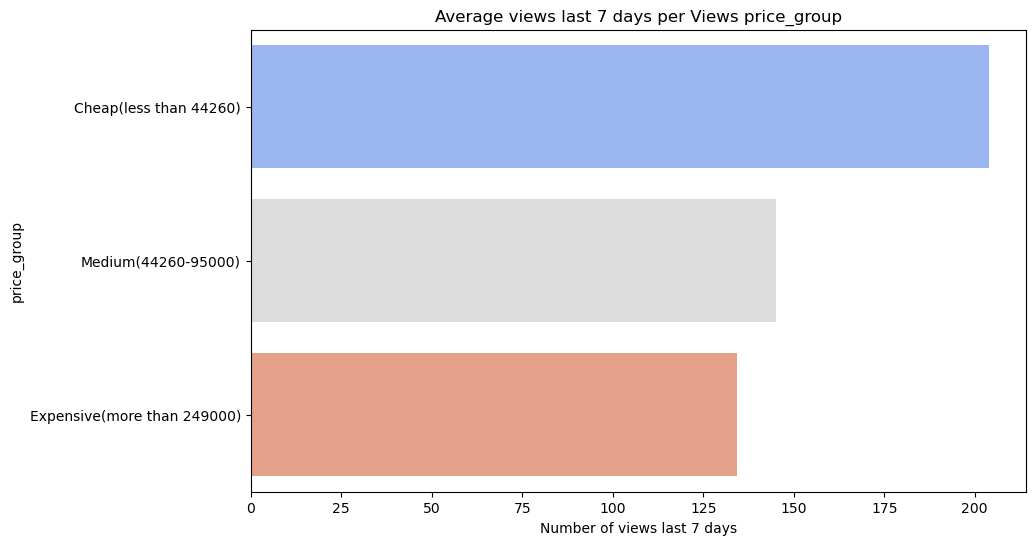

In [203]:
fig= plt.figure(figsize=(10,6))
price_group= df.groupby('price_group')['Number of views last 7 days'].mean().reset_index(drop=False)

sns.barplot(y= 'price_group', x= 'Number of views last 7 days', data= price_group,
            palette="coolwarm")
plt.title("Average views last 7 days per Views price_group")

Boats that are cheap have highest number of views 

** NUmber of views last 7 days**

In [204]:
df['View_Performance']= pd.cut(df['Number of views last 7 days'], bins=[0,70,170,3263],
                               labels=['Low(less than 70)', 'Average(70-170)','Good (more than 170)'])
df['View_Performance'].value_counts()

Average(70-170)         4874
Low(less than 70)       2514
Good (more than 170)    2500
Name: View_Performance, dtype: int64

Text(0.5, 1.0, 'Average views last 7 days per Views price_group')

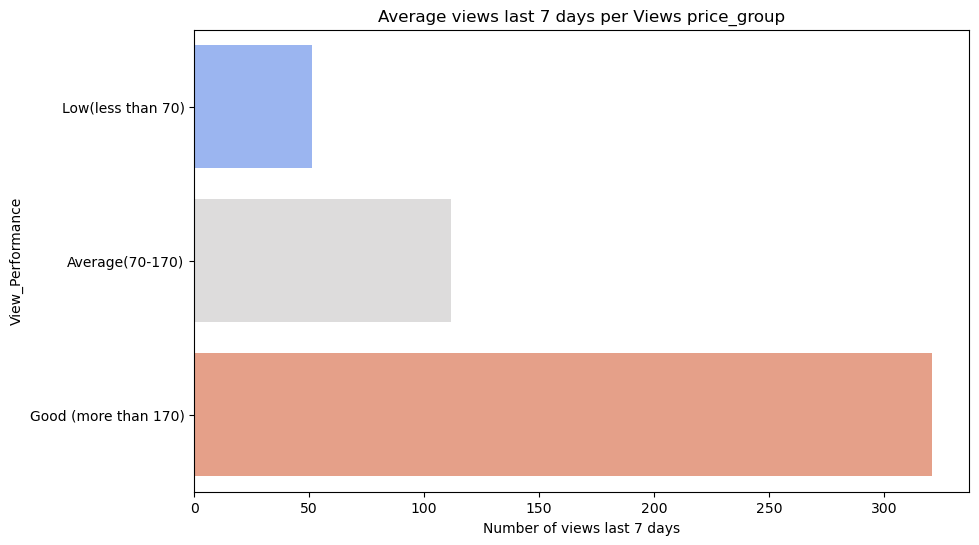

In [209]:
fig= plt.figure(figsize=(10,6))
view_performance= df.groupby('View_Performance')['Number of views last 7 days'].mean().reset_index(drop=False)

sns.barplot(y= 'View_Performance', x= 'Number of views last 7 days', data= view_performance ,
            palette="coolwarm")
plt.title("Average views last 7 days per Views price_group")

### Key Findings

1. The average views incresed when boat type is Wakeboard/Wakesurf, Water ski, Classic, House boat have the highest views 
2. The highest average views is Wakeboard/Wakesurf 
3. The highest average views occur when the material is plastic 
4. In Croatia and Italy , the demand for new boats is more than used boats 
5. Most of the Countries prefer Unleaded and Diesel more 
6. But the main demand varies between countries as follows:
    1. Switzerland has demand on Hybrid 
    2. Croatia and Spain has demand on gas 
    3. Italy has demand on Propane
    4. France has demand on Electric
7. The country has highest average views in Switzerland 
8. France has demand of Aluminum 
9. Boats that are built  very old have highest average views 
10. Boats that are cheap have highest average views 